# House Price Prediction

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export 
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor

In [21]:
df = pd.read_csv("houseprices.csv")

In [22]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Categorical Variables

In [23]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Categorical Variables Distribution

In [24]:
categorical_vars=df.describe(include=[object]).columns

Categorical Variables Visualisation 



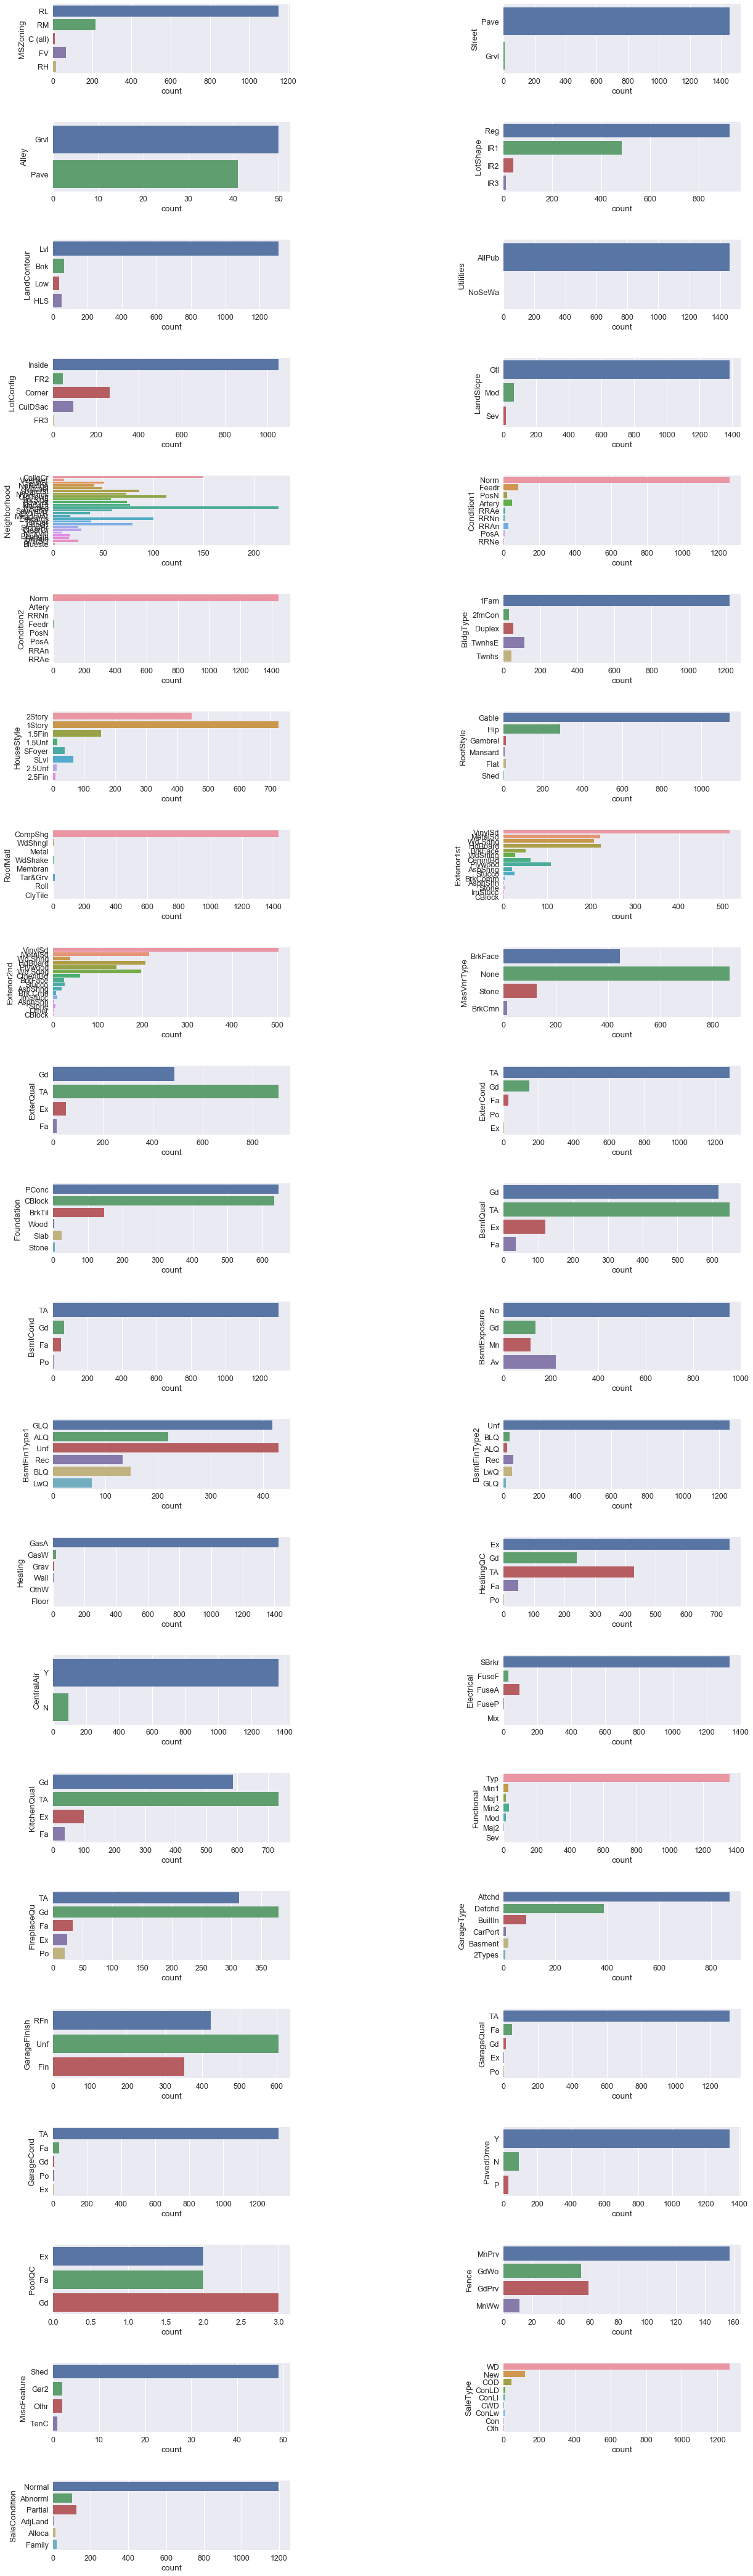

In [25]:
print("Categorical Variables Visualisation","\n")
fig, axes = plt.subplots(43, 2, figsize=(20, 150))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.9, hspace=0.7)
for i, ax in enumerate(axes.ravel()):
    if i > 42:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

plt.show()

# Numeric Variables

In [26]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Numeric Variables Distribution

In [27]:
continous_vars=df.describe().columns

Continuous Variables Visualisation 



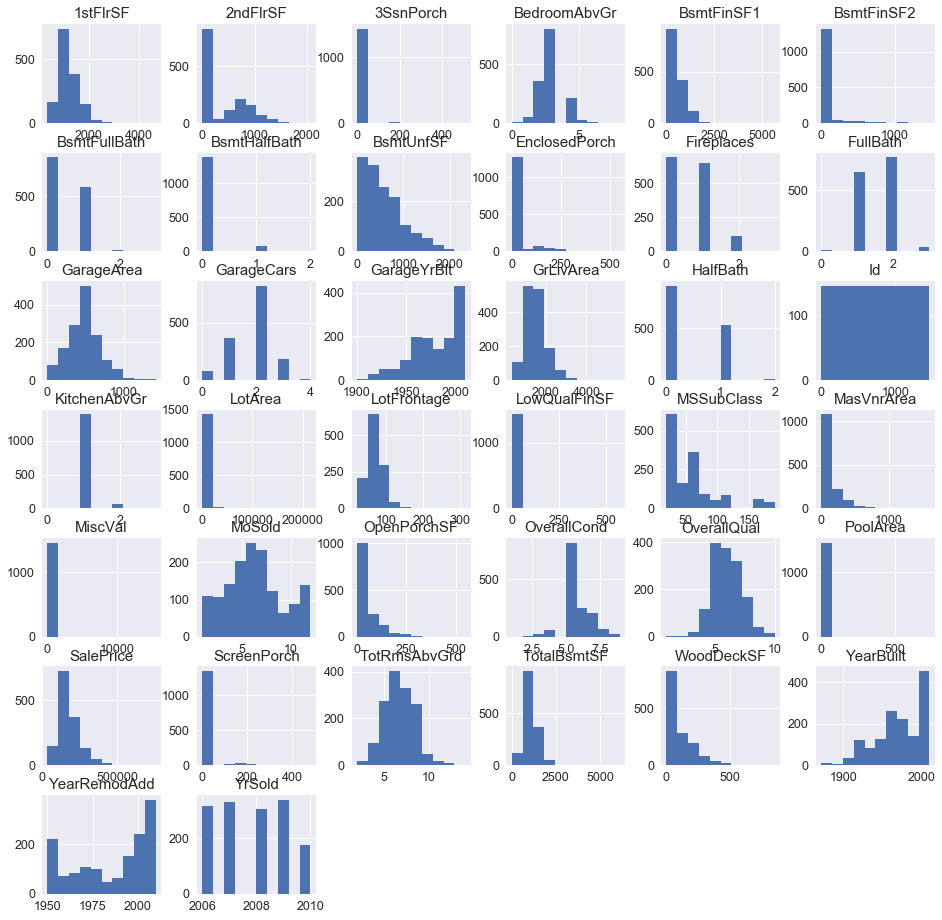

In [28]:
print("Continuous Variables Visualisation","\n")
df.hist(column=continous_vars,figsize=(16,16))

plt.show()

# Correlation Matrix

Correlation Matrix 



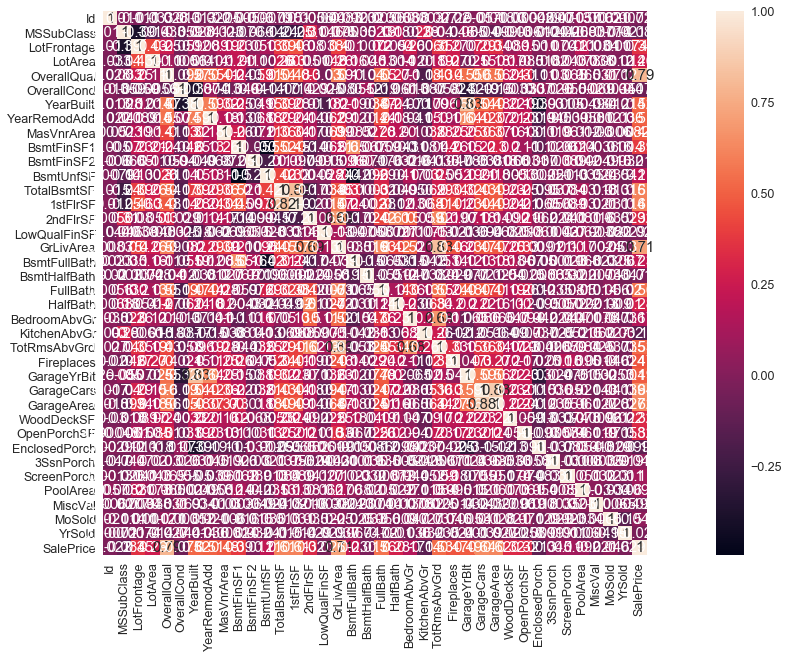

In [29]:
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

# Most Correlated Features

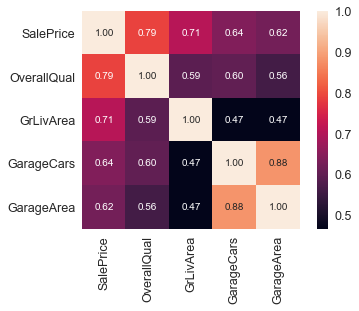

In [30]:
k = 5
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# Null Values

In [31]:
null_values = (df.isnull().sum() / len(df)) * 100
null_values = null_values.drop(null_values[null_values == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_values})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


# Transactions for Null Values

In [32]:
df = df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','Utilities'],axis = 1)

In [33]:
df['FireplaceQu']=df['FireplaceQu'].fillna('NF')

In [34]:
df['LotFrontage'] =df['LotFrontage'].fillna(value=df['LotFrontage'].mean())

In [35]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('NG')

In [36]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [37]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('NB')

In [38]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [39]:
df['MasVnrType'] = df['MasVnrType'].fillna('none')

In [40]:
df.Electrical = df.Electrical.fillna('SBrkr')

# Convert object variables to numeric variables, drop categorical variables

In [41]:
columns = df.select_dtypes(include=[object]).columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 285 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(248)
memory usage: 775.7 KB
None 
 
 



In [42]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=285)

# Normalization 

In [43]:
y = df["SalePrice"]
data_scaled = df.drop(["SalePrice"],axis=1)

In [44]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(data_scaled),columns=data_scaled.columns)

In [45]:
y.shape

(1460,)

In [46]:
data_scaled.shape

(1460, 284)

# PCA

In [47]:
pca_hp = PCA(30)
data_scaled_new = pca_hp.fit_transform(data_scaled)
np.exp(pca_hp.explained_variance_ratio_)

array([ 1.1637576 ,  1.06079227,  1.03883591,  1.03534057,  1.0319719 ,
        1.02876911,  1.02664233,  1.02351012,  1.0221547 ,  1.02141087,
        1.01994832,  1.01856879,  1.01795954,  1.01679501,  1.01673189,
        1.01536612,  1.01493342,  1.01444041,  1.01398638,  1.01364656,
        1.01294547,  1.01266989,  1.01165794,  1.0109697 ,  1.01054234,
        1.01026672,  1.00993358,  1.0093754 ,  1.00905183,  1.00867086])

# Test - train Split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(data_scaled_new,y,random_state=42,
                                                test_size = 0.2)

In [49]:
X_train.shape

(1168, 30)

In [50]:
X_test.shape

(292, 30)

In [51]:
y_train.shape

(1168,)

In [52]:
y_test.shape

(292,)

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
y_pred = linear.predict(X_test)

In [55]:
metrics.r2_score(y_test, y_pred)

0.73038532407134182

In [56]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

45475.625500017595

# Neural Network

In [57]:
from sklearn.neural_network import MLPClassifier

mdl = MLPClassifier(hidden_layer_sizes=(10,5))
mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)
metrics.r2_score(y_test, ypred)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.42109509518835997

In [58]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
rmse

66636.247364673007

# Support Vector Machines

In [59]:
from sklearn.svm import SVC

mdl =  SVC()
mdl.fit(X_train,y_train)
ypred = mdl.predict(X_test)
metrics.r2_score(y_test, ypred)

0.25383777594043366

In [60]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
rmse

75652.54564135382

# Tree Based Models

## Decision Trees

In [61]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeRegressor(max_depth=depth)
    dt_obj.fit(X_train, y_train)
    print ('depth:', depth, 'R_squared:', metrics.r2_score(y_test, dt_obj.predict(X_test)))

depth: 1 R_squared: 0.392850732177
depth: 2 R_squared: 0.555800487478
depth: 3 R_squared: 0.631529565566
depth: 4 R_squared: 0.641223927736
depth: 5 R_squared: 0.658804796785
depth: 6 R_squared: 0.681524507093
depth: 7 R_squared: 0.6835745274
depth: 8 R_squared: 0.650808317499
depth: 9 R_squared: 0.633275703736
depth: 10 R_squared: 0.660321456969
depth: 11 R_squared: 0.630296807259
depth: 12 R_squared: 0.637264512222
depth: 13 R_squared: 0.626916549994
depth: 14 R_squared: 0.617210351388
depth: 15 R_squared: 0.636334433327
depth: 16 R_squared: 0.634132092013
depth: 17 R_squared: 0.611592794733
depth: 18 R_squared: 0.636477794786
depth: 19 R_squared: 0.635881114437


In [62]:
tree_final = DecisionTreeRegressor(max_depth=6)
tree_final.fit(X_train, y_train)
ypred = tree_final.predict(X_test)

In [63]:
metrics.r2_score(y_test, ypred)

0.67980810978618078

In [64]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
rmse

49557.807122953302

## Random Forest 

In [65]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = RandomForestRegressor(max_depth=depth)
    dt_obj.fit(X_train, y_train)
    print ('depth:', depth, 'R_Squared:', metrics.r2_score(y_test, dt_obj.predict(X_test)))

depth: 1 R_Squared: 0.424759272611
depth: 2 R_Squared: 0.595789496964
depth: 3 R_Squared: 0.667460739809
depth: 4 R_Squared: 0.704025523479
depth: 5 R_Squared: 0.711491168667
depth: 6 R_Squared: 0.717607581979
depth: 7 R_Squared: 0.723421218187
depth: 8 R_Squared: 0.753399461992
depth: 9 R_Squared: 0.724094684282
depth: 10 R_Squared: 0.72612434676
depth: 11 R_Squared: 0.718893142745
depth: 12 R_Squared: 0.750359511532
depth: 13 R_Squared: 0.750232334692
depth: 14 R_Squared: 0.75451338132
depth: 15 R_Squared: 0.769791159227
depth: 16 R_Squared: 0.737079503168
depth: 17 R_Squared: 0.711963736346
depth: 18 R_Squared: 0.751984966262
depth: 19 R_Squared: 0.741815204895


In [66]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100,max_depth = 11)
radm_clf.fit( X_train, y_train )
ypred = radm_clf.predict(X_test)

In [67]:
metrics.r2_score(y_test, ypred)

0.75147042744947457

In [68]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
rmse

43661.228722922002

## Gradient Boost

In [69]:
param_test1 = {'n_estimators': [100, 200, 400, 600, 800],
              'max_depth': list(range(1,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                                               max_features='sqrt',subsample=0.8,verbose = 0), 
                        param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)

In [70]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [71]:
gsearch1.best_params_

{'max_depth': 6, 'n_estimators': 400}

In [72]:
gbm = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,max_depth=7, n_estimators=400,
                                                               max_features='sqrt',subsample=0.8, random_state=10)

In [73]:
gbm.fit(X_train, y_train)
ypred = gbm.predict(X_test)

In [74]:
metrics.r2_score(y_test, ypred)

0.71848512952642629

In [75]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
rmse

46468.385905972042